In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import requests
import time
from datetime import datetime
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3
plt.rcParams['axes.titlesize'] = 18

In [ ]:
t = pd.read_csv('timestamps.txt', delimiter='|', names=['times', 'slot'])
t['times'] = pd.to_datetime(t['times'], format="%Y-%m-%d %H:%M:%S.%f")
t['rounded'] = np.asarray([pd.Timestamp(x).round(freq='12S') for x in t['times'].values])
t['rounded2'] = np.asarray([pd.to_datetime(datetime.fromtimestamp(s)) for s in seconds])
t.head()

In [ ]:
seconds = t['slot'].values * 12 + 1606824023
seconds

In [ ]:
pd.to_datetime(datetime.fromtimestamp(1669420163))

In [ ]:
t['rounded2'] = datetime.fromtimestamp(1669420163)

In [ ]:
t.head(n=100)

In [ ]:
diffs = np.asarray([v.total_seconds() for v in t['rounded'] - t['times']])
diffs += 1
# diffs2 = np.asarray([v.total_seconds() for v in  t['times'] - t['rounded2']])

In [ ]:
np.quantile(diffs, .9985)

In [ ]:
bins = np.histogram(diffs, bins=600)[1]

In [ ]:
diffs2 + 18000

In [ ]:
f, ax = plt.subplots(figsize=(10,7))
ax.hist(diffs2 + 18000, bins=500)

plt.show()

In [ ]:
plt.hist(diffs, bins=600)

In [ ]:
t = pd.read_csv('Query Results.csv', delimiter='|', names=['times'])
t['times'] = pd.to_datetime(t['times'], format="%Y-%m-%d %H:%M:%S.%f")
t['rounded'] = np.asarray([pd.Timestamp(x).round(freq='12S') for x in t['times'].values])
# t['rounded2'] = np.asarray([pd.to_datetime(datetime.fromtimestamp(s)) for s in seconds])
t.head()

In [ ]:
diffs = np.asarray([v.total_seconds() for v in t['rounded'] - t['times']])
diffs += 1
# diffs2 = np.asarray([v.total_seconds() for v in  t['times'] - t['rounded2']])

In [ ]:
plt.hist(diffs, bins=600)

In [ ]:
t = pd.read_csv('downloaded-logs-20230404-072549.csv', delimiter=',')
t.head()

In [ ]:
ms = t['jsonPayload.msIntoSlot']
ms

In [ ]:
f, ax = plt.subplots(figsize=(8,5))
ax.plot(np.arange(len(ms)), ms, 'g.')
ax.set_ylim(0,5000)

In [ ]:
f, ax = plt.subplots(figsize=(8,5))
ax.hist(ms[ms<8000], color='g', bins=50)
# ax.set_ylim(0,5000)

In [ ]:
slots = np.asarray(list(set(t['jsonPayload.slot'])))

In [ ]:
len(slots)

In [ ]:
for i in slots:
    print(i)

In [ ]:
np.savetxt('slots.txt', slots)

In [ ]:
plt.plot(slots)

In [ ]:
slots.min(), slots.max()

In [ ]:
payload = '['
for i in feb26['block_number'].values[2100:]:
    template = '"jsonrpc":"2.0","method":"eth_getBlockByNumber","params":["0x{:02x}",false],"id":0'.format(i)
    payload += "{"
    payload += template
    payload += "},"
payload=payload[:-1]
payload += "]"
payload

In [ ]:
curl https://eth-mainnet.g.alchemy.com/v2/cnHeH_ifD-29lrdBoGTMISiDgmrF9ZBz -X POST -H
    "Content-Type: application/json" -s -d '[{"jsonrpc":"2.0","method":"eth_getBlockByNumber","params":["0xfb86ba",false],"id":0},{"jsonrpc":"2.0","method":"eth_getBlockByNumber","params":["0xfb86bb",false],"id":0}]' 
    | jq -jr '.[] | .result["number"], " ", .result["hash"], "\n"' > feb263.txt

In [ ]:
slots

In [ ]:
url = 'https://beaconcha.in/api/v1/slot/6150115'
headers = {'content-type': 'application/json'}
r = requests.get(url, headers=headers)

In [ ]:
r.json()['status']

In [ ]:
res = []
for s in slots:
    time.sleep(0.5)
    url = 'https://beaconcha.in/api/v1/slot/{}'.format(s)
    headers = {'content-type': 'application/json'}
    r = requests.get(url, headers=headers)
    try: 
        if r.json()['status'] != 'OK':
            print(s, False)
            res.append((s, False))
        else:
            res.append((s, True))
            print(s, True)
    except KeyError:
        print(r.json())

In [ ]:
url = 'http://57.128.92.65:3500/eth/v2/beacon/blocks/{}'.format(6145712)
headers = {'content-type': 'application/json'}
r = requests.get(url, headers=headers)
try: 
    code = r.json()['code']
    print(False)
except KeyError:
    print(True)

In [59]:
res = []
for s in slots:
    time.sleep(0.1)
    url = 'http://57.128.92.65:3500/eth/v2/beacon/blocks/{}'.format(s)
    headers = {'content-type': 'application/json'}
    r = requests.get(url, headers=headers)
    try: 
        code = r.json()['code']
        print(s, False)
        res.append((s, False))
    except KeyError:
        print(s, True)
        res.append((s, True))

6144827 True
6144830 True
6144832 False
6144834 False
6144837 True
6144838 False
6144844 True
6144851 True
6144854 True
6144880 True
6144888 True
6144892 True
6144902 True
6144916 True
6144920 True
6144928 True
6144930 True
6144935 True
6144936 True
6144943 True
6144944 True
6144947 True
6144948 True
6144949 True
6144957 True
6144960 True
6144982 True
6144985 True
6144988 True
6144989 True
6144991 True
6145002 True
6145009 True
6145013 True
6145017 True
6145018 True
6145022 True
6145029 True
6145034 True
6145037 True
6145038 True
6145042 True
6145043 True
6145048 True
6145050 True
6145051 True
6145052 True
6145053 True
6145056 False
6145061 True
6145067 True
6145070 True
6145074 True
6145075 True
6145080 True
6145081 True
6145083 True
6145084 True
6145086 True
6145088 True
6145089 True
6145091 True
6145092 True
6145093 True
6145094 False
6145096 True
6145098 True
6145101 True
6145104 True
6145117 True
6145118 True
6145120 False
6145121 True
6145125 True
6145130 True
6145131 True
614513

6146754 True
6146755 True
6146756 True
6146758 True
6146760 True
6146762 True
6146764 True
6146770 True
6146772 True
6146774 True
6146778 True
6146784 True
6146785 True
6146787 True
6146793 True
6146804 True
6146805 True
6146814 True
6146815 True
6146823 True
6146824 True
6146828 True
6146831 True
6146832 True
6146833 True
6146836 True
6146838 True
6146841 True
6146843 True
6146844 True
6146846 True
6146848 True
6146850 True
6146856 True
6146862 True
6146863 True
6146864 True
6146865 True
6146866 True
6146875 True
6146877 True
6146881 True
6146883 True
6146884 True
6146887 True
6146888 True
6146891 True
6146895 True
6146897 True
6146901 True
6146904 True
6146908 True
6146919 True
6146929 True
6146930 True
6146939 True
6146941 True
6146943 True
6146946 True
6146948 True
6146957 True
6146965 True
6146966 True
6146967 True
6146970 True
6146971 True
6146975 True
6146976 False
6146982 True
6146984 True
6146985 True
6146986 True
6146990 True
6146993 True
6146995 True
6147003 True
6147007 Tru

6148599 True
6148600 True
6148603 True
6148609 True
6148610 True
6148621 True
6148623 True
6148624 True
6148625 True
6148626 True


In [60]:
res = np.asarray(res)

In [61]:
res

array([[6144827,       1],
       [6144830,       1],
       [6144832,       0],
       ...,
       [6148624,       1],
       [6148625,       1],
       [6148626,       1]])

In [66]:
res[:,1].sum(), len(res), len(res) - res[:,1].sum()

(1232, 1269, 37)

In [65]:
6148626 - 6144827

3799

In [ ]:
len(res), res[]

In [75]:
37/1269

0.029156816390858944

## post 3s

In [67]:
t = pd.read_csv('downloaded-logs-20230404-132958.csv', delimiter=',')
t.head()

,insertId,jsonPayload.blockHash,jsonPayload.contentLength,jsonPayload.headSlot,jsonPayload.idArg,jsonPayload.level,jsonPayload.method,jsonPayload.mevBoostV,jsonPayload.msIntoSlot,jsonPayload.msg,...,receivedLocation,resource.labels.cluster_name,resource.labels.container_name,resource.labels.location,resource.labels.namespace_name,resource.labels.pod_name,resource.labels.project_id,resource.type,severity,timestamp
0,qcp5erd2vpnrrrud,0x91a6011be8c01ca8b3da434490f49714d012bdf94656...,54037,6150442,NaN,info,getPayload,1.4.0,1857,getPayload request received,...,NaN,midori,proposer-api,europe-west1-b,default,proposer-api-dbd9cb97f-6zdz6,ultra-sound-relay,k8s_container,INFO,2023-04-04T17:29:00Z
1,k23g10yoxoz9v1ym,0xe3b3f8f11dc7300dd7fea84ece939f63f960dfd70e5d...,84765,6150438,NaN,info,getPayload,v1.3.2-44-g08bd891,700,getPayload request received,...,NaN,midori,proposer-api,europe-west1-b,default,proposer-api-dbd9cb97f-m7mcw,ultra-sound-relay,k8s_container,INFO,2023-04-04T17:28:11Z
2,x8rqwpc22vnlmoi0,0x87d16ce758de89213329d0f68c933a12664732ccd33d...,57880,6150434,NaN,info,getPayload,v1.5.0,947,getPayload request received,...,NaN,midori,proposer-api,europe-west1-b,default,proposer-api-dbd9cb97f-mf8dr,ultra-sound-relay,k8s_container,INFO,2023-04-04T17:27:23Z
3,mc0o06mm8js0tecg,0x2d100c7e2326027a0fa344e835e92f9b67dbc9c1601d...,84755,6150428,NaN,info,getPayload,v1.5.0,811,getPayload request received,...,NaN,midori,proposer-api,europe-west1-b,default,proposer-api-dbd9cb97f-mf8dr,ultra-sound-relay,k8s_container,INFO,2023-04-04T17:26:11Z
4,jzgo4obzf0426lmo,0xd2c42bf3d991a69e36ba79d481f1ebceed9f78d0059d...,84763,6150424,NaN,info,getPayload,-,671,getPayload request received,...,NaN,midori,proposer-api,europe-west1-b,default,proposer-api-dbd9cb97f-6zdz6,ultra-sound-relay,k8s_container,INFO,2023-04-04T17:25:23Z


In [68]:
slots = np.asarray(list(set(t['jsonPayload.slot'])))
len(slots)

718

In [69]:
res = []
for s in slots:
    time.sleep(0.1)
    url = 'http://57.128.92.65:3500/eth/v2/beacon/blocks/{}'.format(s)
    headers = {'content-type': 'application/json'}
    r = requests.get(url, headers=headers)
    try: 
        code = r.json()['code']
        print(s, False)
        res.append((s, False))
    except KeyError:
        print(s, True)
        res.append((s, True))

6150144 True
6150147 True
6150149 True
6150151 True
6150157 True
6150158 True
6150160 True
6150162 True
6150163 True
6150164 True
6150165 True
6150166 True
6150167 True
6150169 True
6150171 True
6150173 True
6150175 True
6150176 True
6150177 True
6150178 True
6150181 True
6150182 True
6150183 True
6150191 True
6150198 True
6150199 True
6150201 True
6150202 True
6150205 True
6150208 True
6150217 True
6150222 True
6150229 True
6150233 True
6150238 True
6150240 True
6150243 True
6150247 True
6150248 True
6150253 True
6150255 True
6150260 True
6150262 True
6150264 True
6150265 True
6150268 True
6150270 True
6150275 True
6150279 True
6150280 True
6150281 True
6150293 True
6150295 True
6150297 True
6150298 True
6150304 True
6150305 True
6150309 True
6150313 True
6150315 True
6150316 True
6150327 True
6150328 True
6150331 True
6150332 True
6150339 True
6150341 True
6150342 True
6150345 True
6150350 True
6150352 True
6150356 True
6150358 True
6150359 True
6150361 True
6150369 True
6150370 True

6149891 True
6149892 True
6149893 True
6149899 True
6149904 True
6149905 True
6149906 True
6149907 True
6149911 True
6149914 True
6149921 True
6149922 True
6149924 True
6149926 True
6149929 True
6149933 True
6149942 True
6149943 True
6149944 True
6149946 True
6149947 True
6149949 True
6149951 True
6149954 True
6149955 True
6149957 True
6149959 True
6149961 True
6149962 True
6149963 True
6149964 True
6149966 True
6149967 True
6149973 True
6149974 True
6149975 True
6149978 True
6149980 True
6149982 True
6149984 True
6149997 True
6149998 True
6150000 True
6150001 True
6150008 True
6150009 True
6150010 True
6150013 True
6150014 True
6150019 True
6150022 True
6150025 True
6150027 True
6150033 True
6150034 True
6150035 True
6150045 True
6150047 True
6150050 True
6150053 True
6150056 True
6150058 True
6150060 True
6150062 True
6150063 True
6150067 True
6150071 True
6150077 True
6150078 True
6150081 True
6150084 True
6150086 True
6150093 True
6150098 True
6150102 True
6150106 True
6150107 True

In [71]:
res = np.asarray(res)

In [72]:
res[:,1].sum(), len(res), len(res) - res[:,1].sum()

(714, 718, 4)

In [74]:
4/718

0.005571030640668524

In [73]:
slots.max() - slots.min()

2096

In [76]:
ms = t['jsonPayload.msIntoSlot']

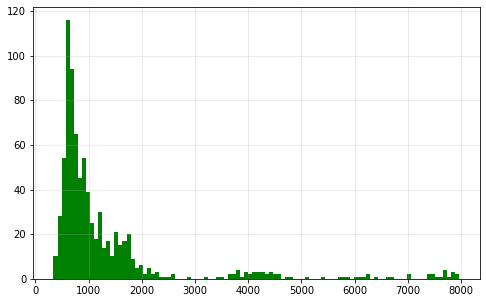

In [79]:
f, ax = plt.subplots(figsize=(8,5))
ax.hist(ms[ms<8000], color='g', bins=100)

plt.show()